In [221]:
from scipy.stats import binom
import numpy as np
import matplotlib.pyplot as plt

In [222]:
binom_h0 = binom(n=30, p=0.5)
binom_h0.rvs(1) #возвращает какую-то одну реализацию случайной величины

array([12])

In [223]:
binom_h0.pmf(20)

np.float64(0.027981600724160654)

In [224]:
x_grid = np.arange(1, 31)
probs = binom_h0.pmf(x_grid)

## Односторонний критерий

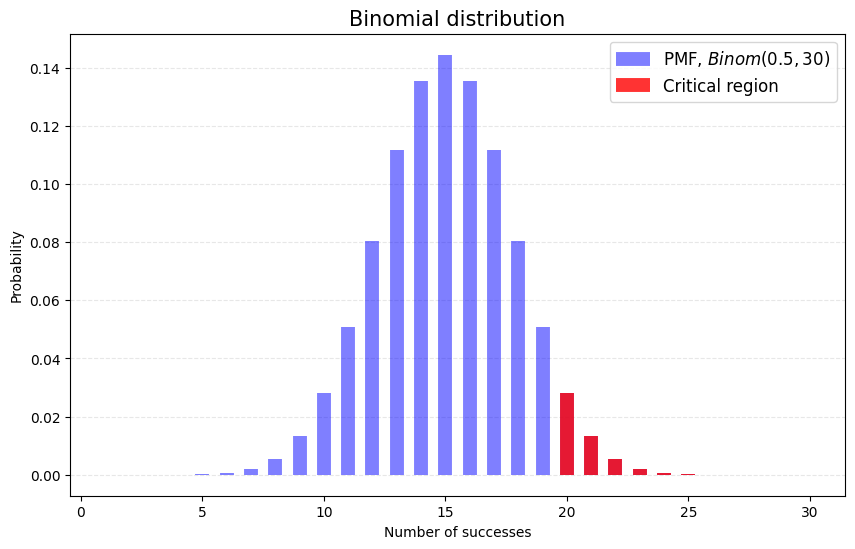

In [225]:
plt.figure(figsize=(10, 6)) 

plt.vlines(x_grid, 0, probs, linewidth=10.0, color='blue', alpha=0.5, label='PMF, $Binom(0.5, 30)$')

crit_reg = x_grid >= 20
plt.vlines(x_grid[crit_reg], 0, probs[crit_reg], linewidth=10.0, color='red', alpha=0.8, label='Critical region')

plt.title('Binomial distribution', fontsize=15)
plt.ylabel('Probability')
plt.xlabel('Number of successes')
plt.legend(fontsize=12) 
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

In [226]:
np.sum(probs[crit_reg])

np.float64(0.04936857335269451)

In [227]:
crit_reg = x_grid >= 19
np.sum(probs[crit_reg])

np.float64(0.10024421103298661)

In [228]:
binom_h0.cdf(19)

np.float64(0.9506314266473055)

In [229]:
1 - binom_h0.cdf(19)

np.float64(0.04936857335269451)

In [230]:
binom_h0.ppf(0.95)

np.float64(19.0)

In [231]:
def make_binom_criterion(n, mu=0.5, alpha=0.05):
    '''
    Вычисление критического значения для одностороннего теста (биномиальное распределение)
    ---------------------------------------------------------
    n - размер выборки
    mu - вероятность успеха при нулевой гипотезе
    alpha - допустимый уровень ошибки 1-ого рода
    
    '''

    binom_ho = binom(n, mu)
    q = binom_ho.ppf(1-alpha)
    return q +1

make_binom_criterion(30)

np.float64(20.0)

In [232]:
def pvalue_binom(n, mu, q):
    '''
    Вычисление p-value для одностороннего теста (биномиальное распределение)
    ---------------------------------------------------------
    n - размер выборки
    mu - вероятность успеха при нулевой гипотезе
    q - стастика, полученная в ходе эксперимента
    
    '''

    binom_h0 = binom(n, mu)
    return 1 - binom_h0.cdf(q -1)

pvalue_binom(30, 0.5, 19)

np.float64(0.10024421103298664)

## Двухсторонний критерий

In [233]:
binom_h0_nonsym =  binom(30, p=0.8)

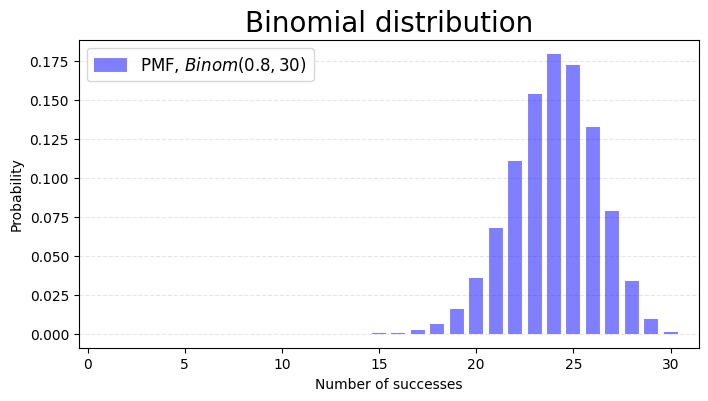

In [234]:
plt.figure(figsize=(8,4))

probs = binom_h0_nonsym.pmf(x_grid)
plt.vlines(x_grid, 0, probs, linewidth=10.0, color='blue', alpha=0.5, label='PMF, $Binom(0.8, 30)$')

plt.title('Binomial distribution', fontsize=20)
plt.ylabel('Probability')
plt.xlabel('Number of successes')
plt.legend(fontsize=12, loc='upper left') 
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.show()

In [235]:
def two_sided_criterion_nonsym(n, mu, alpha):

    '''
    Вычисление критических значений для двухстороннего теста
    ---------------------------------------------------------
    n - размер выборки
    mu - вероятность успеха при нулевой гипотезе
    alpha - допустимый уровень ошибки 1-ого рода
    
    '''
    
    binom_h0 = binom(n, mu)

    c2 = binom_h0.ppf(1 - alpha/2) + 1
    c1 = binom_h0.ppf(alpha/2) - 1

    return c1, c2

In [236]:
c1, c2 = two_sided_criterion_nonsym(30, 0.8, 0.05)
c1,c2

(np.float64(18.0), np.float64(29.0))

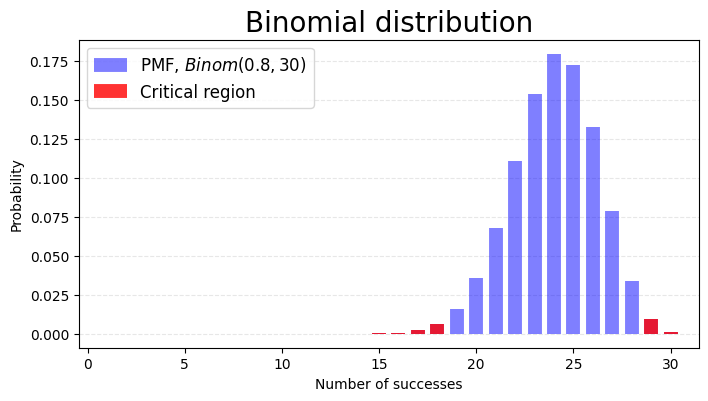

In [237]:
plt.figure(figsize=(8,4))

probs = binom_h0_nonsym.pmf(x_grid)
plt.vlines(x_grid, 0, probs, linewidth=10.0, color='blue', alpha=0.5, label='PMF, $Binom(0.8, 30)$')

crit_reg = (x_grid >= 29) | (x_grid <= 18)
plt.vlines(x_grid[crit_reg], 0, probs[crit_reg], linewidth=10.0, color='red', alpha=0.8, label='Critical region')

plt.title('Binomial distribution', fontsize=20)
plt.ylabel('Probability')
plt.xlabel('Number of successes')
plt.legend(fontsize=12, loc='upper left') 
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.show()

In [238]:
def pvalue_two_sided(n, mu, q):

    '''
    Вычисление p-value для двухстороннего теста
    ---------------------------------------------------------

    n - размер выборки
    mu - вероятность успеха при нулевой гипотезе
    q - стастика, полученная в ходе эксперимента
    
    '''
     
    binom_h0 = binom(n, mu)

    pvalue_left = binom_h0.cdf(q)
    pvalue_right = 1 - binom_h0.cdf(q - 1)

    return 2 * min(pvalue_left, pvalue_right, 0.5)

In [239]:
pvalue_two_sided(30, 0.8, 28)

np.float64(0.08835797030399428)

## Мощность теста

In [240]:
def power_test(n, mu, mu_factual, alpha=0.05):

    '''
    Вычисление мощности теста для биномиального распределения
    ---------------------------------------------------------

    n - размер выборки
    mu - вероятность успеха при нулевой гипотезе
    mu_factual - вероятность успеха при альтернативной гипотезе 
    alpha - допустимый уровень ошибки 1-ого рода
    
    '''
    
    binom_h0 = binom(n, mu)
    binom_alt = binom(n, mu_factual)

    critical_value = binom_h0.ppf(1 - alpha) + 1

    return 1 - binom_alt.cdf(critical_value -1)

In [241]:
power_test(30, 0.5, 0.72, 0.05)

np.float64(0.8057093839291422)

In [242]:
def fpr_power_test(n, mu, mu_factual, q, alpha=0.05):

    '''
    Вычисление FPR и мощности теста для биномиального распределения
    ---------------------------------------------------------

    n - размер выборки
    mu - вероятность успеха при нулевой гипотезе
    mu_factual - вероятность успеха при альтернативной гипотезе 
    alpha - допустимый уровень ошибки 1-ого рода
    q - стастика, полученная в ходе эксперимента
    
    '''
    
    binom_h0 = binom(n, mu)
    binom_alt = binom(n, mu_factual)

    p_value = 1 - binom_h0.cdf(q - 1)
    critical_value = binom_h0.ppf(1 - alpha) + 1

    return p_value, 1 - binom_alt.cdf(critical_value -1)

In [243]:
fpr_power_test(30, 0.5, 0.6, 19)

(np.float64(0.10024421103298664), np.float64(0.2914718612234968))

In [244]:
n_grid = np.arange(10, 600, 10)
power = power_test(n=n_grid, mu=0.5, mu_factual=0.6)

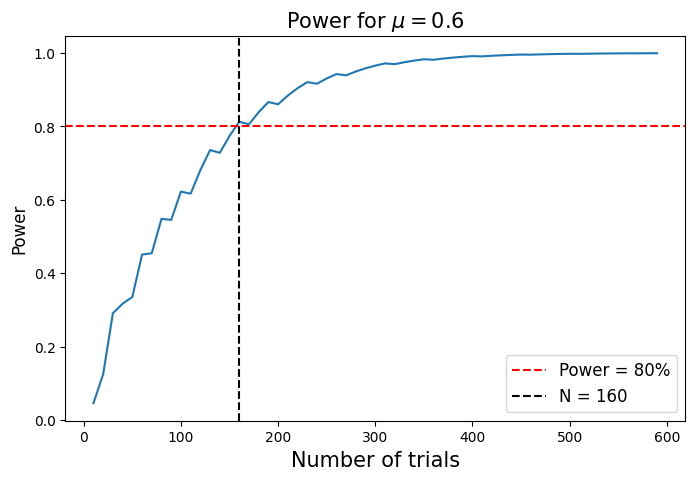

In [245]:
plt.figure(figsize=(8,5))
plt.title(f'Power for $\\mu = 0.6$', fontsize=15)
plt.xlabel('Number of trials', fontsize=15)
plt.ylabel('Power', fontsize=12)

plt.plot(n_grid, power)
plt.axhline(0.8, ls='--', color='red', label='Power = 80%')

min_n = n_grid[power >= 0.8].min()
plt.axvline(min_n, ls='--', color='black', label=f'N = {min_n}')
plt.legend(fontsize=12)
plt.show()

In [246]:
mu_grid = np.linspace(0.5, 1, 500)
power = power_test(n=30, mu=0.5, mu_factual=mu_grid)

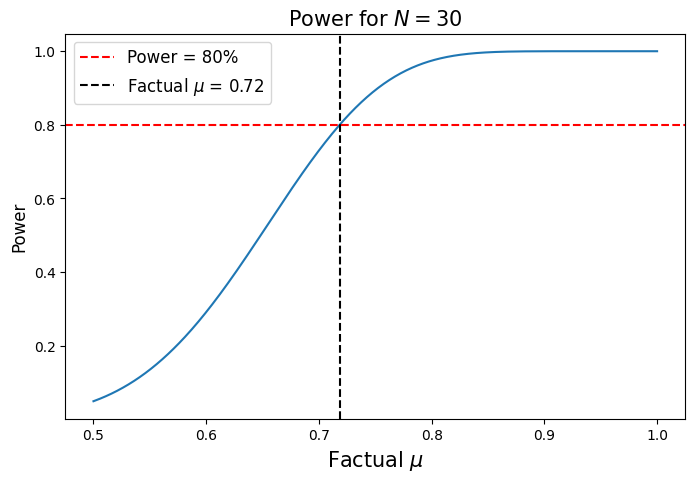

In [247]:
plt.figure(figsize=(8,5))
plt.title(f'Power for $N = 30$', fontsize=15)
plt.xlabel('Factual $\\mu$', fontsize=15)
plt.ylabel('Power', fontsize=12)

plt.plot(mu_grid, power)
plt.axhline(0.8, ls='--', color='red', label='Power = 80%')

min_mu = mu_grid[power >= 0.8].min()
plt.axvline(min_mu, ls='--', color='black', label=f'Factual $\\mu$ = {min_mu:.2f}')
plt.legend(fontsize=12)
plt.show()

## Minimal Detectable Effect (MDE)